**Sklearn - Lineer Regresyon**


İki veya daha fazla sayısal değişken arasındaki doğrusal ilişkiyi incelemeye lineer regresyon denir. (Eğri uydurma olarakta düşünülebilir.)
En basit ve en sık kullanılan makine öğrenmesi algoritmasıdır.

*   Girdiler bağımsız değişken  (öznitelik)
*   Sonuç değişkenine bağımlı değişken denir (hedef değişken)

Girdiler çoğunlukla matris, çıktılar ise vektör yapısındadır.

Analizde bir adet öznitelik var ise **Basit Lineer Regresyon**, birden fazla öznitelik var ise **Çoklu Lineer Regrasyon Analizi** denir.

En uygun yöntem/modeli bulmak için R2 ve RMSE kullanılır. Tahmin ile gerçek değerler arasındaki karelerin farkının karekökü. Özetle, hatanın minimize edilmesi amaçtır.

y = ax + b
a=slope (katsayı),  b= intercept (sabit)

Veri Seti Linki https://archive.ics.uci.edu/ml/datasets/Student+Performance



**Basit Lineer Regresyon**
y = ax + b


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

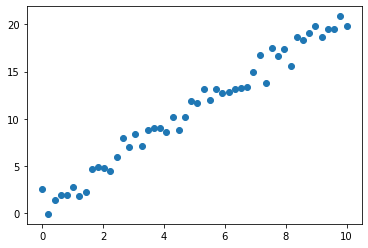

In [2]:
x=np.linspace(0, 10, 50)    
y=2*x + 1 + np.random.randn(50) 
plt.scatter(x, y);

In [3]:
# Model Oluşturma
# from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1,1),y.reshape(-1,1))      # fit komutu tek sütun alır reshape (-1,1)  kaç satır olursa olsun, tek sutun olsun

LinearRegression()

In [4]:
# Veri Setini Eğitim ve Test Olarak Bölme
x_egitim, x_test, y_egitim, y_test=train_test_split(x,y,test_size=0.2,random_state=2)
model = LinearRegression()
model.fit(x_egitim.reshape(-1,1), y_egitim.reshape(-1,1))

LinearRegression()

In [5]:
print("Katsayı: ",model.coef_)
print("Sabit: ", model.intercept_)

Katsayı:  [[2.05638743]]
Sabit:  [0.65298338]


In [ ]:
print("Kurulan Lineer Regresyon Modeli Y= {} + {}*x".format(model.intercept_.round(2),model.coef_.round(2)))

Kurulan Lineer Regresyon Modeli Y= [1.09] + [[2.01]]*x


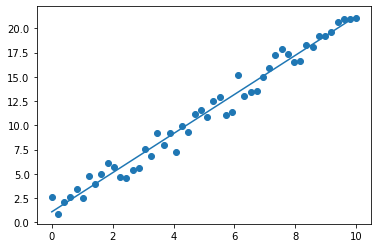

In [ ]:
y_tahmin=model.predict(x.reshape(-1,1))
plt.scatter(x, y);   # gerçek değer
plt.plot(x,y_tahmin)  # hesaplanan değer

**Lineer Regresyon Performans Ölçütleri**
R2 Skor
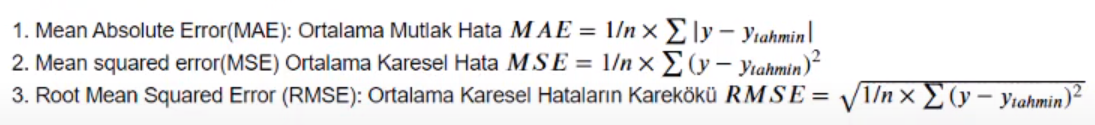

In [ ]:
# Performans Ölçümü (R2 Skor)
r2_score(y,y_tahmin)

0.9762753464450704

In [ ]:
mean_squared_error(y, y_tahmin, squared=False)      # squared=False RMSE, True MSE

0.9069080693590479

In [ ]:
# y değerlerinin karşılaştırılması
sonuc=pd.DataFrame({'x':x,'y':y.flatten(), 'y tahmin':y_tahmin.flatten()})      # flatten numpy modülünde veriyi düzleştiriyor (tek sütun)
sonuc 

**Çoklu Lineer Regresyon** 

Veri Seti Linki https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Colab csv Dosyadan Yükleme 1. yol
from google.colab import files 
   
uploaded = files.upload()
# Dosya colab in altına ana dizine yükleniyor,

Saving student-mat.csv to student-mat.csv


In [9]:
df=pd.read_csv('/content/student-mat.csv',sep=';')     # dosya ... yol bilgisini al
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [10]:
# Başarı Notuna Etki Eden Özniteliklerin Çıkarılması
df=df[['G1','G2','G3','studytime','failures','absences','age']]
df.head()

,G1,G2,G3,studytime,failures,absences,age
0,5,6,6,2,0,6,18
1,5,5,6,2,0,4,17
2,7,8,10,2,3,10,15
3,15,14,15,3,0,2,15
4,6,10,10,2,0,4,16


In [11]:
# Özniteliklerin ismini değiştirme
df.rename(columns={'G1':'Quiz','G2':'Vize','G3':'Final','studytime':'Çalışma Zamanı','failures':'Başarısızlık','absences':'DevamDurumu','age':'Yaş'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df.head()

,Quiz,Vize,Final,Çalışma Zamanı,Başarısızlık,DevamDurumu,Yaş
0,5,6,6,2,0,6,18
1,5,5,6,2,0,4,17
2,7,8,10,2,3,10,15
3,15,14,15,3,0,2,15
4,6,10,10,2,0,4,16


In [ ]:
df.dtypes

Quiz              int64
Vize              int64
Final             int64
Çalışma Zamanı    int64
Başarısızlık      int64
DevamDurumu       int64
Yaş               int64
dtype: object

In [13]:
#Final özniteliğini veri setinden çıkarmak
final=np.array(df['Final'])   # Final özniteliğine ait verileri dizi haline getir
veri=np.array(df.drop('Final',axis=1))     # Final özniteliğini axis=1  sütun olarak sil, kalan verileri diziye dönüştür

In [14]:
veri

array([[ 5,  6,  2,  0,  6, 18],
       [ 5,  5,  2,  0,  4, 17],
       [ 7,  8,  2,  3, 10, 15],
       ...,
       [10,  8,  1,  3,  3, 21],
       [11, 12,  1,  0,  0, 18],
       [ 8,  9,  1,  0,  5, 19]])

Veri seti eğitim ve test verisi olarak ikiye ayrılır.
Eğitim verisi ile model kurulur, test verisi ile model değerlendirilir

In [15]:
#veri setini parçalama
from sklearn.model_selection import train_test_split
# % 20 test % 80 eğitim (X=veri > girdi, y=final > çıktı)
X_train, X_test, y_train, y_test=train_test_split(veri,final,test_size=0.2,random_state=2)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)    # eğri uydur

LinearRegression()

In [18]:
model.score(X_test, y_test)    # modelin test verisi üzerindeki doğruluğu

0.8325898318712226

In [19]:
model.score(X_train, y_train)  # modelin eğitim verisi üzerindeki doğruluğu

0.8261275475197141

In [20]:
print('Katsayılar : ', model.coef_)
print('Sabit : ',model.intercept_ )

Katsayılar :  [ 0.19575962  0.95558174 -0.24215827  0.12730705  0.03566925 -0.23224281]
Sabit :  2.1549097406751496


In [21]:
df.head()

,Quiz,Vize,Final,Çalışma Zamanı,Başarısızlık,DevamDurumu,Yaş
0,5,6,6,2,0,6,18
1,5,5,6,2,0,4,17
2,7,8,10,2,3,10,15
3,15,14,15,3,0,2,15
4,6,10,10,2,0,4,16


In [22]:
# verilen değerlere göre final notunun tahmini
tahmin=np.array([[10,8,2,0,5,16]])
model.predict(tahmin)

array([7.73530462])

In [23]:
# bilinen bir değere göre final notu tahmini indis =4
tahmin=np.array([[15,14,3,0,2,15]])
model.predict(tahmin)

array([14.33066999])